# Assignment 2 - Pandas and Pipeline


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

## 1.	Load the data into a Python session as a Pandas DataFrame. Verify that all columns have the correct data types, and fix incorrect ones if necessary

In [3]:
# Step 1: Load the dataset
auto_mpg = pd.read_csv("auto-mpg.csv")

In [4]:
# Display first few entries of data
auto_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [5]:
# Checking data types and fixing incorrect ones
auto_mpg["horsepower"] = pd.to_numeric(auto_mpg["horsepower"], errors='coerce')  # Convert horsepower to numeric
auto_mpg.dtypes

,0
mpg,float64
cylinders,int64
displacement,float64
horsepower,float64
weight,int64
acceleration,float64
model year,int64
origin,int64
car name,object


In [6]:
auto_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


## 2. Split the data 75% training and 25% testing

In [7]:
# Step 2: Split the data (75% training, 25% testing)
train_df, test_df = train_test_split(auto_mpg, test_size=0.25, random_state=42)


## 3.	Visualize necessary columns in the data. After this point, you should create three lists:

*	Columns that are numeric and have symmetric distributions

*	Columns that are numeric and have skewed distributions

*	Columns that are categorical.


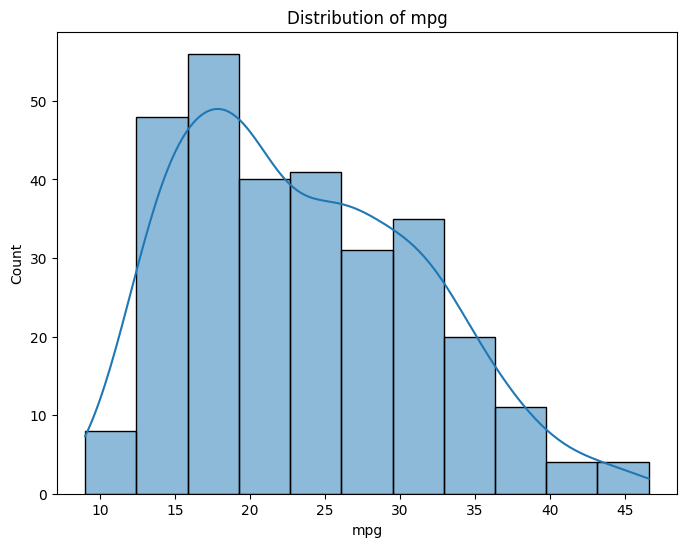

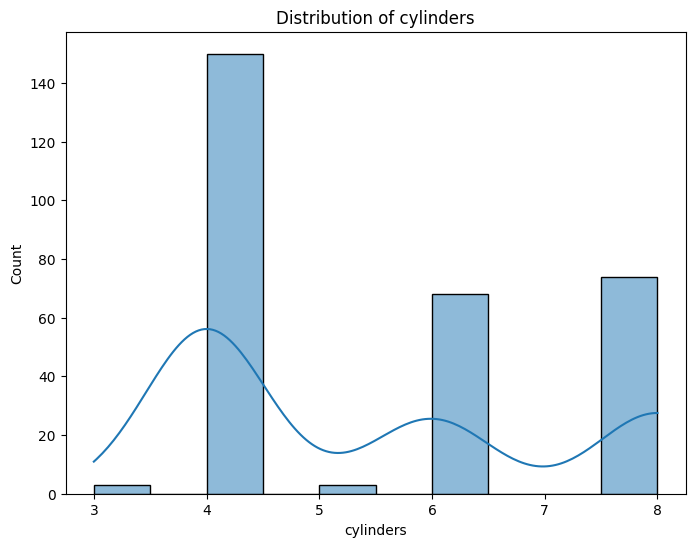

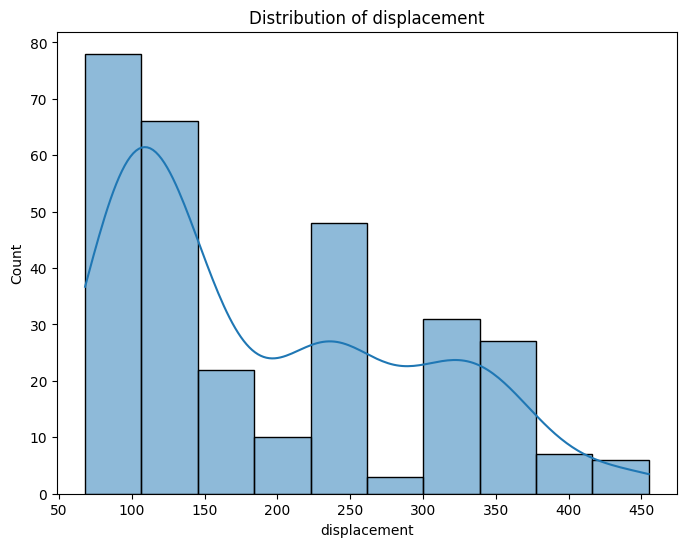

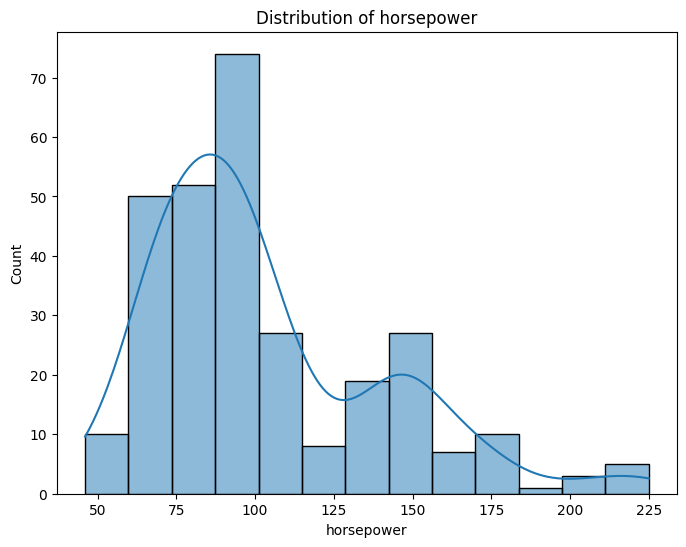

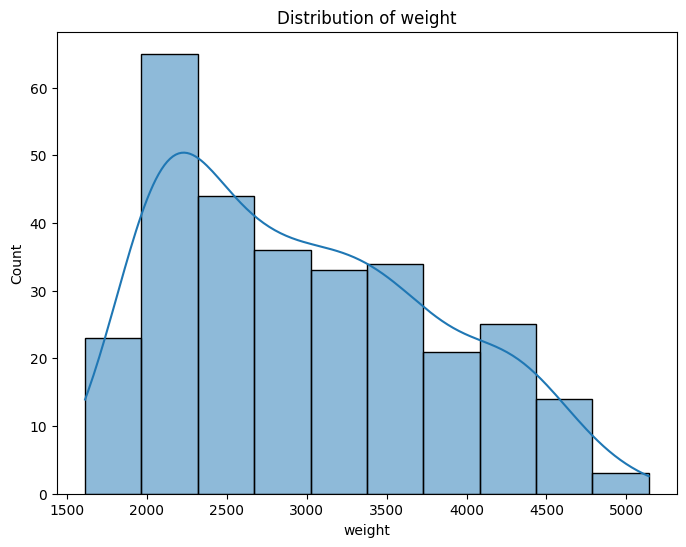

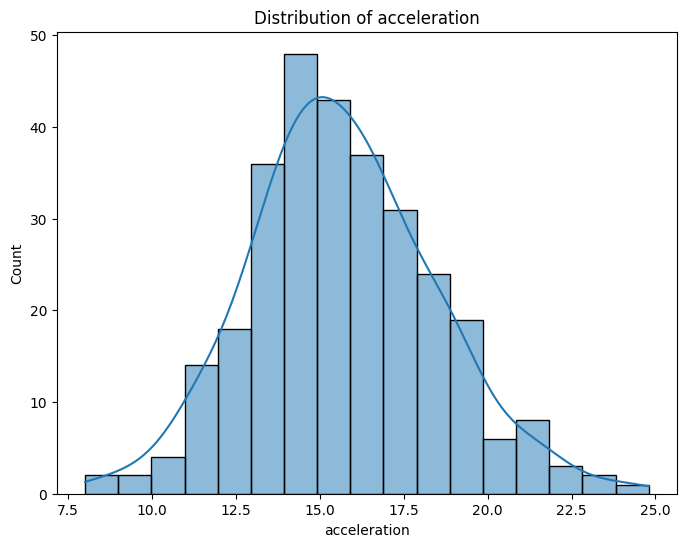

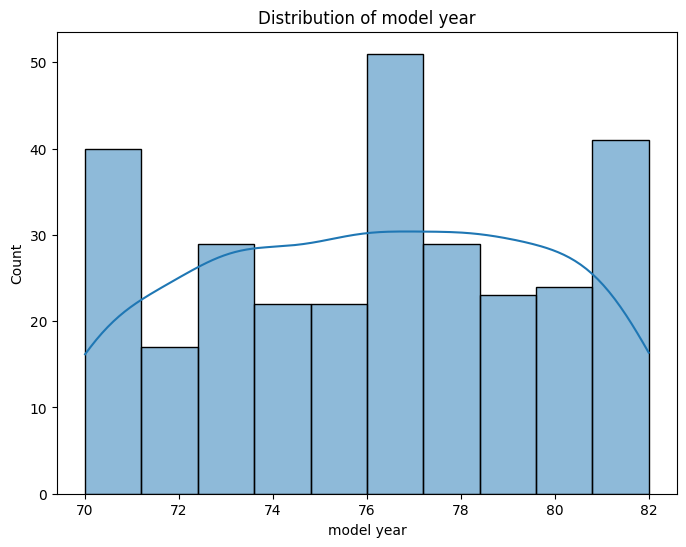

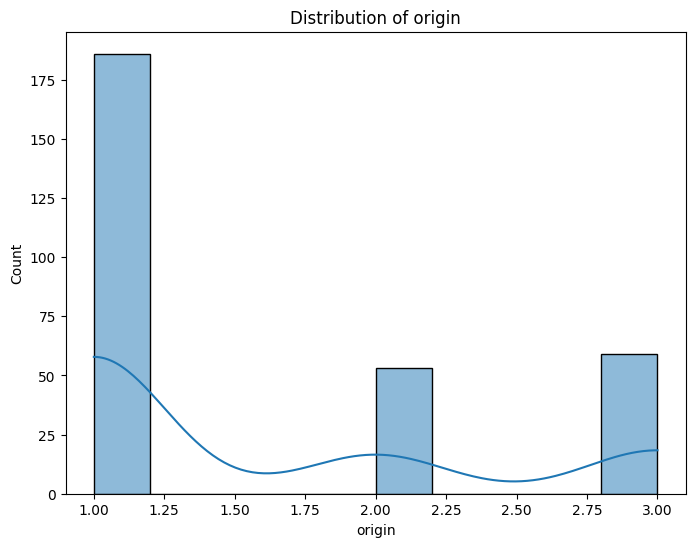

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Visualize necessary columns
numeric_cols = train_df.select_dtypes(include=np.number).columns
categorical_cols = train_df.select_dtypes(exclude=np.number).columns

for col in numeric_cols:
  plt.figure(figsize=(8, 6))
  sns.histplot(train_df[col], kde=True)
  plt.title(f'Distribution of {col}')
  plt.show()
  print('\n')


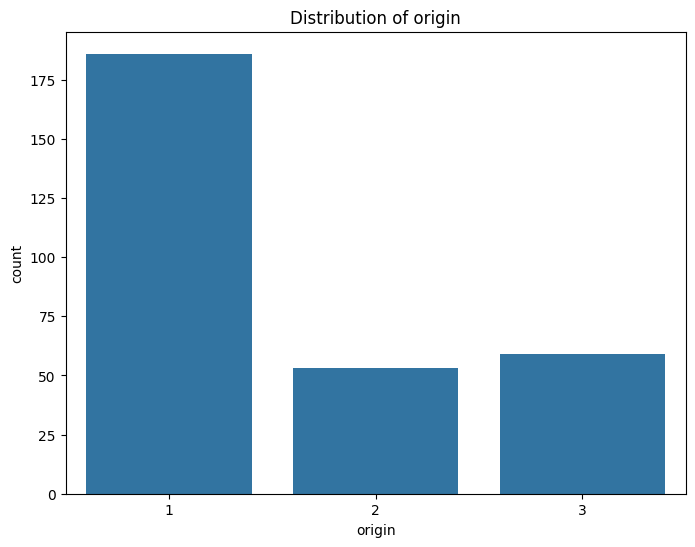

In [16]:
# plot the distribution of categorical columns
for col in categorical_cols:
  plt.figure(figsize=(8, 6))
  sns.countplot(x=train_df[col])
  plt.title(f'Distribution of {col}')
  plt.show()
  print('\n')

In [17]:
# Identifying column types
symmetric_cols = [col for col in numeric_cols if abs(auto_mpg[col].skew()) < 0.5]
skewed_cols = [col for col in numeric_cols if abs(auto_mpg[col].skew()) >= 0.5]

print("Symmetric Columns:", symmetric_cols)
print("Skewed Columns:", skewed_cols)


Symmetric Columns: ['mpg', 'acceleration', 'model year']
Skewed Columns: ['cylinders', 'displacement', 'horsepower', 'weight', 'origin']


In [19]:
# Columns that are categorical.
categorical_cols_list = list(categorical_cols)

print("Categorical Columns:", categorical_cols_list)

Categorical Columns: ['origin']


## 4.	Build a pipeline as follows:
•	Numeric and symmetric columns: 	 Imputation -> Standardization

•	Numeric and skewed columns:		 Imputation -> Log transformation -> Standardization

•	Categorical columns: 			One hot encoder


In [20]:
import numpy as np
# Create transformers for numeric columns
numeric_transformer_symmetric = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

numeric_transformer_skewed = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('log', FunctionTransformer(np.log1p)),  # Apply log transformation
    ('scaler', StandardScaler())
])


In [21]:
# Create transformer for categorical columns
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num_sym', numeric_transformer_symmetric, symmetric_cols),
        ('num_skew', numeric_transformer_skewed, skewed_cols),
        ('cat', categorical_transformer, categorical_cols_list)
    ])


## 5. Train the pipeline on the training data. Then perform transformation on the training data and test data

In [22]:
# Train the pipeline and transform the data
preprocessor.fit(train_df)

# Transform training data
train_transformed = preprocessor.transform(train_df)

# Transform test data
test_transformed = preprocessor.transform(test_df)


## 6.	Print the shape of the processed training data and processed test data

In [23]:
print("Shape of processed training data:", train_transformed.shape)
print("Shape of processed test data:", test_transformed.shape)


Shape of processed training data: (298, 11)
Shape of processed test data: (100, 11)
